<a href="https://colab.research.google.com/github/gundall98/AI-X-Machine-Learning/blob/master/AI%2BX_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹 크롤링을 통한 KOSPI,투자자별 매매 동향 데이터 불러오기
## 데이터 출처: 네이버 금융
### 저자: 2017056617 파이낸스경영학과 박건 

* 인터넷 속도에 따라 런닝 타임이 변동될 수 있음


In [15]:

from bs4 import BeautifulSoup
import urllib.request as req
import pandas as pd

Fdata = []
Inddata = []
Insdata = []
Ddata = []
KOSPIs=[]
dates = []
KOSPIrate = []

# 매매동향 기준 페이지당 10개의 데이터
# 코스피 기준 페이지당 6개의 데이터
num = input("확인할 데이터의 수를 입력하시오: \n")


# -----------------------------------------------#
#              투자자별 매매동향                 #
# -----------------------------------------------#
pages = int(num)//10
left = int(num)%10

for i in range(1,pages+1):
  url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=2020060404&sosok=&page="+str(i)


  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')

  for j in tr:
    date = j.find('td',{'class':'date2'})
    if date != None:
      date= j.find_all('td')[:4][0].text
      Foreign = j.find_all('td')[:4][2].text
      Individual = j.find_all('td')[:4][1].text
      Institution = j.find_all('td')[:4][3].text
      Ddata.insert(0,date)
      Fdata.insert(0,Foreign)
      Inddata.insert(0,Individual)
      Insdata.insert(0,Institution)

# 잔여 데이터 불러오기 (입력한 요구 데이터 수량 % 크롤링한 페이지 수)
if left != 0:
  url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=2020060404&sosok=&page="+str(pages+1)

  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')
  count = 0

  for j in tr:
    if count < left:
      date = j.find('td',{'class':'date2'})
      if date != None:

        date= j.find_all('td')[:4][0].text
        Foreign = j.find_all('td')[:4][2].text
        Individual = j.find_all('td')[:4][1].text
        Institution = j.find_all('td')[:4][3].text
        Ddata.insert(0,date)
        Fdata.insert(0,Foreign)
        Inddata.insert(0,Individual)
        Insdata.insert(0,Institution)
        count += 1

# -----------------------------------------------#
#              KOSPI 종가 데이터                 #
# -----------------------------------------------#
pages = int(num)//6
left = int(num)%6

for i in range(1,pages+1):
  url = "https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page="+str(i)

  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')

  for j in tr:
    date = j.find('td',{'class':'date'})
    if date != None:
      date= j.find_all('td')[:4][0].text
      if date not in dates:
        
        dates.append(date)

        KOSPI = j.find_all('td')[:4][1].text
        KOSPIrates = j.find_all('td')[:4][3].text.replace("\t","").replace("\n","")
        
        KOSPIs.insert(0,KOSPI)
        KOSPIrate.insert(0,KOSPIrates)
# 잔여 데이터 불러오기 (입력한 요구 데이터 수량 % 크롤링한 페이지 수)
if left != 0:
  url = "https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page="+str(pages+1)

  response = req.urlopen(url)
  soup = BeautifulSoup(response, 'html.parser') 

  body = soup.find('body')
  tr = body.find_all('tr')
  count = 0

  for j in tr:
    if count < left:
      date = j.find('td',{'class':'date'})
      if date != None:
        date= j.find_all('td')[:4][0].text
        if date not in dates:
          
          dates.append(date)

          KOSPI = j.find_all('td')[:4][1].text
          KOSPIrates = j.find_all('td')[:4][3].text.replace("\t","").replace("\n","")
        
          KOSPIs.insert(0,KOSPI)
          KOSPIrate.insert(0,KOSPIrates)
          count += 1
    
# -----------------------------------------------#
#           pandas 이용 데이터 정리              #
# -----------------------------------------------#
table = pd.DataFrame(index = Ddata)
table["개인투자자 (억원)"] = Inddata
table["외국인 (억원)"] = Fdata
table["기관 (억원)"] = Insdata
table["KOSPI (원)"] = KOSPIs
table

확인할 데이터의 수를 입력하시오: 
101


,개인투자자 (억원),외국인 (억원),기관 (억원),KOSPI (원)
19.11.08,63,"-1,037",630,"2,137.23"
19.11.11,"1,405","-1,722",-9,"2,124.09"
19.11.12,238,-395,-151,"2,140.92"
19.11.13,"2,277",-280,"-2,419","2,122.45"
19.11.14,-620,"-2,087","2,261","2,139.23"
...,...,...,...,...
20.03.30,"1,986","-4,272","2,236","1,717.12"
20.03.31,"3,845",-711,"-2,901","1,754.64"
20.04.01,"11,508","-5,752","-6,199","1,685.46"
20.04.02,"2,700","-6,233","3,599","1,724.86"


# 데이터 시각화


<Figure size 432x288 with 0 Axes>

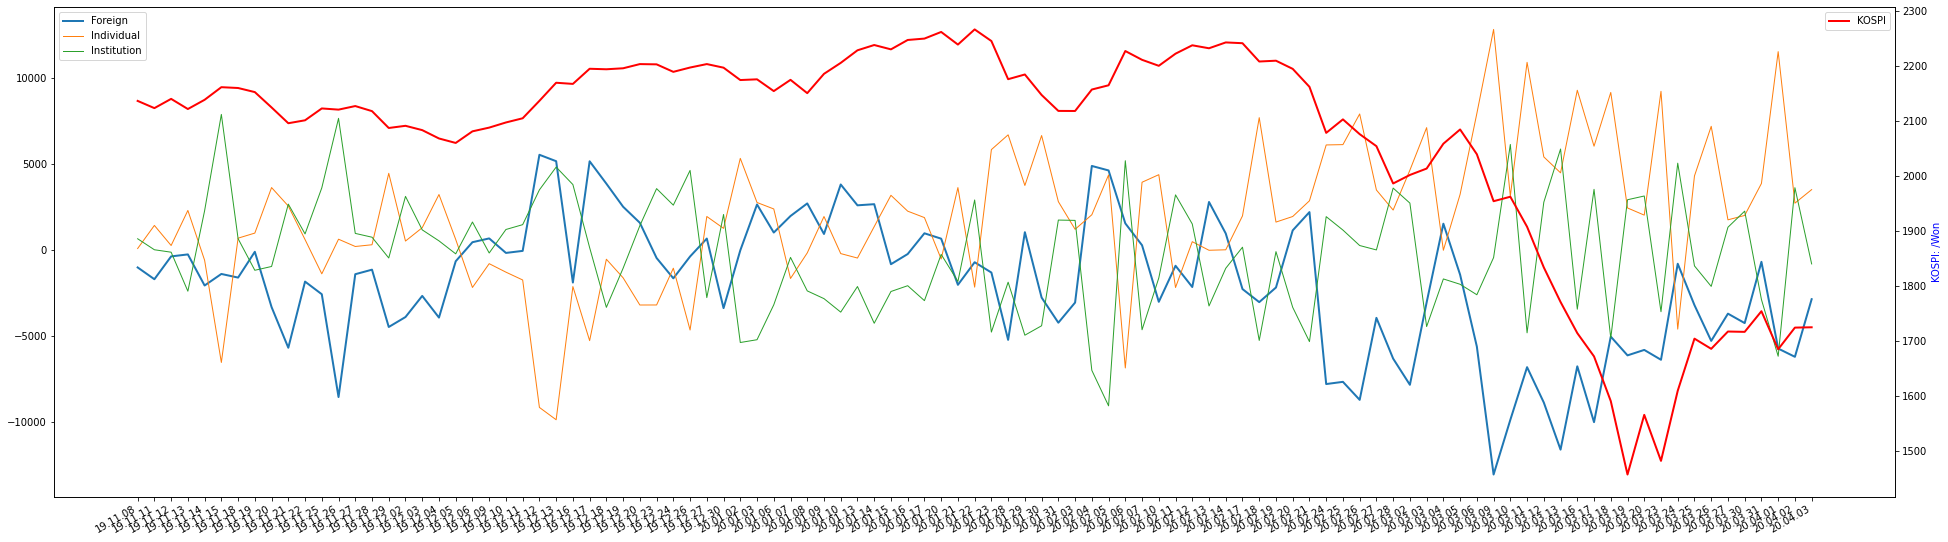

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import font_manager,rc
#rc('font',family = 'Malgun Gothic')



ForeignFloatData = []
Foreign = table["외국인 (억원)"]

IndFloatData = []
Ind = table["개인투자자 (억원)"]

InsFloatData = []
Ins = table["기관 (억원)"]

KOSPIFloatData = []
KOSPI = table["KOSPI (원)"]

for i in range(len(Foreign)):
  data = Foreign[i].replace(",","")
  ForeignFloatData.append(float(data))

for i in range(len(Ind)):
  data = Ind[i].replace(",","")
  IndFloatData.append(float(data))

for i in range(len(Ins)):
  data = Ins[i].replace(",","")
  InsFloatData.append(float(data))

for i in range(len(KOSPI)):
  data = KOSPI[i].replace(",","")
  KOSPIFloatData.append(float(data))
  



fig=plt.figure()
if len(ForeignFloatData) < 10:
  fig, ax1 = plt.subplots(figsize=(10,10))
elif len(ForeignFloatData) < 100 and len(ForeignFloatData) >= 10:
  fig, ax1 = plt.subplots(figsize=(len(ForeignFloatData)//7,20))
elif len(ForeignFloatData) > 100:
  fig, ax1 = plt.subplots(figsize=(len(ForeignFloatData)//3,len(ForeignFloatData)//10))
fig.autofmt_xdate(rotation=30)
ax1.plot(Ddata,ForeignFloatData,linewidth=2,label = "Foreign")
ax1.plot(Ddata,IndFloatData,linewidth=1,label = "Individual")
ax1.plot(Ddata,InsFloatData,linewidth=1,label = "Institution")
ax2 = ax1.twinx()
ax1.legend(loc='upper left')
ax2.plot(Ddata,KOSPIFloatData,linewidth=2,label="KOSPI",color = "red")
ax2.set_ylabel('KOSPI: /Won', color='b')


ax2.legend()
plt.show()

# 수집 데이터 기반 코스피 가격 예상 결과값의 **신뢰도** 구하기
* 각 상황에 맞게 머신이 데이터르 기반으로 학습하게끔 한다
* 해당 상황에 알맞는 결과값을 표준편차가 아닌 이해하기 쉬운 확률을 신뢰도로 반영한다
* 러닝 알고리즘에서 벗어나는 결과는 100에서 확률을 뺀 값으로 신뢰도로 반영한다


In [21]:
datas = []
learning = []

def fx():
  datas = []
  learning = []
  for i in range(len(ForeignFloatData)):
    nsum = ForeignFloatData[i]+IndFloatData[i]+InsFloatData[i]
    # 각 투자성향의 합이 + 이고, KOSPI 가격이 상승했을 시
    if nsum >0 and KOSPIrate[i][0] == "+":
      result = "0"
      learning.append(result)
    # 각 투자성향의 합이 - 이고, KOSPI 가격이 하락했을 시
    elif nsum <0 and KOSPIrate[i][0] == "-":
      result = "0"
      learning.append(result)
    # 각 투자성향의 합이 - 이지만, KOSPI 가격이 상승했을 시
    elif nsum <0 and KOSPIrate[i][0] == "+":
      # 개인투자자들의 매수가 외국인 매수 혹은 매도보다 많을 시
      if IndFloatData[i] > abs(ForeignFloatData[i]):
        result = "0"
        learning.append(result)
      # 기관의 매수가 외국인 매수 혹은 매도보다 많은 시
      elif InsFloatData[i] > abs(ForeignFloatData[i]):
        result = "0"
        learning.append(result)
      # 외국인의 매수가 개인 매수 성향보다 강할 시
      elif ForeignFloatData[i] > 0 and ForeignFloatData[i] > InsFloatData[i]:
        result = "0"
        learning.append(result)
      # 외국인의 매수가 기관 매수 성향보다 강할 시
      elif ForeignFloatData[i] > 0 and ForeignFloatData[i] > IndFloatData[i]:
        result = "0"
        learning.append(result)
      else:
        result = "1"
        learning.append(result)
    # 외국인 매매 성향이 매수우위이고, 코스피 가격이 상승했을 때
    elif ForeignFloatData[i] > 0 and KOSPIrate[i][0] == "+":
      result = "0"
      learning.append(result)
    # 외국인 매매 성향이 매도우위이고, 코스피 가격이 하락했을 때
    elif ForeignFloatData[i] < 0 and KOSPIrate[i][0] == "-":
      result = "0"
      learning.append(result)
    # 외국인+기관의 매도보다 개인의 매수가 더 많고, 코스피 가격이 상승했을 때
    elif ForeignFloatData[i] < 0 and InsFloatData[i]<0 and IndFloatData[i] > abs(InsFloatData[i]) + abs(ForeignFloatData[i]) and KOSPIrate[i][0] == "+":
      result = "0"
      learning.append(result)
    else:
      result = "1"
      learning.append(result)
      
  accuracy = str(learning.count("0") / len(ForeignFloatData)*100)+'%'
  return accuracy
# 외국인의 매수가 코스피 가격 상승에 가장 큰 영향을 미치고, 개인투자자와 기간의 매수 성향이 외국인의 매도 성향보다 강하면
# 코스피 가격이 상승한다.
a = fx()
print("\n알고리즘 러닝결과: ("+(str(len(ForeignFloatData)))+" 개의 데이터)")
print("데이터 기반 신뢰도: "+str(a)+"\n")


    



알고리즘 러닝결과: (101 개의 데이터)
데이터 기반 신뢰도: 87.12871287128714%



# 머신러닝의 결과를 이용해서 미래 코스피 가격 예측 혹은 과거 가격 Back Testing 하기
* 외국인/개인/기관 의 매매성향을 미래 혹은 과거 데이터를 입력하여 예측하거나 백테스팅한다
* 신뢰도가 높더라도 일정의 오차는 있을 수 있다
* 해당 머신러닝을 이용한 투자의 책임은 당사자에게 있음을 알린다



In [0]:
# a == 각 매매성향의 합
# b == 외국인 매매성향
# c == 개인 매매성향
# d == 기관 매매성향
# e == 신뢰도 결과값
def predict(a,b,c,d,e):
  if a >=0:
    if b >= 0:
      if b >= c + d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+e)
      elif b < c+d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      elif c >= b+d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+e)
      elif c < b+d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      elif d >= b+c:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+e)
      elif d < b+c:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
    elif b < 0:
      if d >= b+c:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      elif c >= b+d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      else:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+e)
  else:
    if b >= 0:
      if b >= c + d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      elif b < c+d:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+e)
      elif c >= b+d:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      elif c < b+d:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+e)
      elif d >= b+c:
        result = "당일 코스피 상승 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")
      elif d < b+c:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+e)
    elif b < 0:
      if d >= b+c:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+e)
      elif c >= b+d:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+e)
      else:
        result = "당일 코스피 하락 예상 -----"
        print(result+" 신뢰도: "+str(100-float(e[0:-1]))+"%")



accuracy = fx()

def execute():
  print("\n단위: /억원")
  ForeignFloatDataP = int(input("예상 외국인 투자자 매수+/매도량-: \n"))
  IndFloatDataP = int(input("예상 개인 매수+/매도량-: \n"))
  InsFloatDataP = int(input("예상 기관 매수+/매도량-: \n"))
  nsum = ForeignFloatDataP+IndFloatDataP+InsFloatDataP
  predict(nsum,ForeignFloatDataP,IndFloatDataP,InsFloatDataP,accuracy)
  print("\n")
  execute()
execute()


단위: /억원
예상 외국인 투자자 매수+/매도량-: 
500
예상 개인 매수+/매도량-: 
-300
예상 기관 매수+/매도량-: 
-100
당일 코스피 상승 예상 ----- 신뢰도: 87.12871287128714%



단위: /억원
예상 외국인 투자자 매수+/매도량-: 
-500
예상 개인 매수+/매도량-: 
300
예상 기관 매수+/매도량-: 
100
당일 코스피 하락 예상 ----- 신뢰도: 87.12871287128714%



단위: /억원
예상 외국인 투자자 매수+/매도량-: 
-200
예상 개인 매수+/매도량-: 
200
예상 기관 매수+/매도량-: 
50
당일 코스피 상승 예상 ----- 신뢰도: 12.871287128712865%



단위: /억원
예상 외국인 투자자 매수+/매도량-: 
-400
예상 개인 매수+/매도량-: 
800
예상 기관 매수+/매도량-: 
-500
당일 코스피 하락 예상 ----- 신뢰도: 87.12871287128714%



단위: /억원
